In [101]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics

In [133]:
happy = pd.read_csv("World Happiness Report 2019 scores.csv")
free = pd.read_csv("human-freedom-index-2019.csv")
hour = pd.read_csv("work hours.csv")
unemployment = pd.read_csv("unemployment.csv")

In [134]:
happiness = happy.filter(items = ["Country", "Happiness score"])
happiness.columns = ["Country", "Happiness_score"]
happiness.head()

,Country,Happiness_score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488


In [135]:
freedoms = free.filter(items = ["ISO_code", "countries", "pf_rol", "pf_ss", "pf_movement", "pf_religion", "pf_association", "pf_expression", "pf_identity", "ef_government", "ef_legal", "ef_money", "ef_trade", "ef_regulation"])
freedoms.columns = ["ISO_code", "Country", "pf_rol", "pf_ss", "pf_movement", "pf_religion", "pf_association", "pf_expression", "pf_identity", "ef_government", "ef_legal", "ef_money", "ef_trade", "ef_regulation"]
freedoms.head(6)

,ISO_code,Country,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_regulation
0,ALB,Albania,5.3,9.3,10.0,9.20,10,8.6,5.8,7.5,5.1,9.6,8.3,7.8
1,DZA,Algeria,3.8,7.8,5.8,4.90,5,7.3,0.0,3.6,4.7,7.3,2.8,5.4
2,AGO,Angola,3.4,8.1,6.7,8.80,4,6.5,5.0,6.8,3.0,5.6,3.2,5.7
3,ARG,Argentina,5.7,8.8,10.0,7.80,7.5,8.7,10.0,5.7,4.0,6.5,6.5,5.6
4,ARM,Armenia,4.9,9.1,8.3,6.20,6.5,7.2,8.2,7.4,5.9,9.5,8.2,7.5
5,AUS,Australia,7.8,9.9,10.0,9.10,10,9.4,9.0,7.0,7.9,9.5,7.6,8.5


In [136]:
unemployment.columns = ["Country", "Country Code", "2017"]
unemployment.head()

,Country,Country Code,2017
0,Aruba,ABW,NaN
1,Afghanistan,AFG,1.559
2,Angola,AGO,7.139
3,Albania,ALB,13.750
4,Andorra,AND,NaN


In [137]:
hours = hour.filter(items = ["ref_area.label", "obs_value"])
hours.columns = ["Country", "Hours"]
hours.head()

,Country,Hours
0,Albania,38.837518
1,Armenia,38.732900
2,Australia,35.947195
3,Bangladesh,48.604300
4,Bosnia and Herzegovina,41.588600


In [148]:
merge1 = happiness.merge(freedoms, on = "Country")
merge2 = merge1.merge(unemployment, on = "Country")
data1 = merge2.merge(hours, on = "Country")
df2 = data1.replace({'-':np.nan, 0:np.nan})
df3 = df2.dropna()
df3["pf_religion"] = df3.pf_religion.astype(float)
df3["pf_association"] = df3.pf_association.astype(float)
df3.dtypes

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Country             object
Happiness_score    float64
ISO_code            object
pf_rol             float64
pf_ss              float64
pf_movement        float64
pf_religion        float64
pf_association     float64
pf_expression      float64
pf_identity        float64
ef_government      float64
ef_legal           float64
ef_money           float64
ef_trade           float64
ef_regulation      float64
Country Code        object
2017               float64
Hours              float64
dtype: object

In [149]:
data = df3.drop(["ISO_code", "Country Code"], axis = 1)
data.head()

,Country,Happiness_score,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,2017,Hours
0,Norway,7.554,8.6,9.9,10.0,7.4,10.0,9.8,9.2,4.9,8.5,9.6,7.6,7.6,4.162,34.000000
1,Switzerland,7.480,8.3,9.9,10.0,8.2,10.0,9.7,9.0,7.6,8.4,9.9,7.6,8.5,4.797,34.500000
2,New Zealand,7.307,7.9,9.9,10.0,9.7,10.0,9.5,9.0,6.6,8.6,9.5,8.6,9.1,4.702,37.000000
3,Canada,7.278,7.7,9.7,10.0,9.0,10.0,9.5,10.0,6.5,7.8,9.6,7.9,8.6,6.340,35.755400
4,Australia,7.228,7.8,9.9,10.0,9.1,10.0,9.4,9.0,7.0,7.9,9.5,7.6,8.5,5.594,35.947195


In [150]:
X = np.array(data.drop(["Country", "Happiness_score"], axis = 1))
y = np.array(data["Happiness_score"])

In [151]:
model = LinearRegression()

In [152]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
r_sq = model.score(x, y)

In [154]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7238734958441078


C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


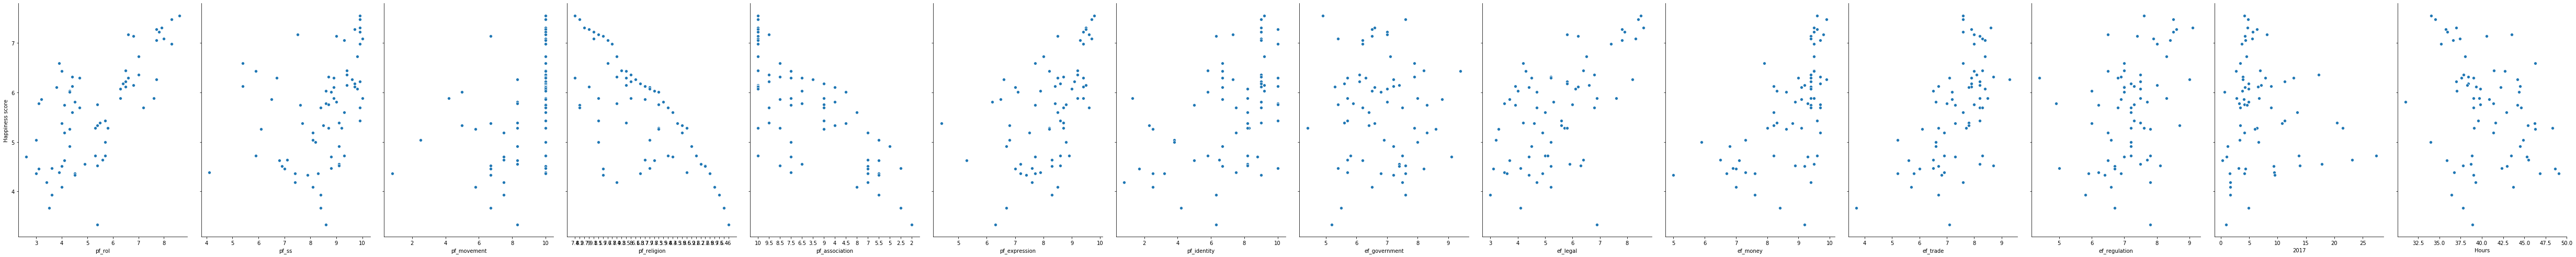

In [112]:
sns.pairplot(data, x_vars=["pf_rol", "pf_ss", "pf_movement", "pf_religion", "pf_association", "pf_expression", "pf_identity", "ef_government", "ef_legal", "ef_money", "ef_trade", "ef_regulation", "2017", "Hours"], y_vars='Happiness score', size=7, aspect=0.7)

In [115]:
data.columns

Index(['Country', 'Happiness score', 'pf_rol', 'pf_ss', 'pf_movement',
       'pf_religion', 'pf_association', 'pf_expression', 'pf_identity',
       'ef_government', 'ef_legal', 'ef_money', 'ef_trade', 'ef_regulation',
       '2017', 'Hours'],
      dtype='object')

In [155]:
lm1 = smf.ols(formula='Happiness_score~ pf_rol + pf_ss + pf_movement+ pf_religion+ pf_association+ pf_expression+ pf_identity+ ef_government+ ef_legal+ ef_money+ ef_trade+ ef_regulation+ Q("2017")+ Hours', data=data).fit()

# print the coefficients
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     9.924
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           2.43e-10
Time:                        17:19:10   Log-Likelihood:                -53.644
No. Observations:                  68   AIC:                             137.3
Df Residuals:                      53   BIC:                             170.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7297      1.769      0.978      0.333      -1.819       5.279
pf_rol             0.5926      0.150      3.940      0.000       0.291       0.894
pf_ss             -0.1184      0.085     -1.388      0.171      -0.289       0.053
pf_movement       -0.0438      0.058     -0.756      0.453      -0.160       0.072
pf_religion        0.0302      0.082      0.369      0.714      -0.134       0.195
pf_association     0.1183      0.067      1.777      0.081      -0.015       0.252
pf_expression     -0.1262      0.140     -0.900      0.372      -0.407       0.155
pf_identity        0.1105      0.045      2.434      0.018       0.019       0.202
ef_government      0.0979      0.094      1.042      0.302      -0.091       0.286
ef_legal          -0.1547      0.150     -1.032      0.307      -0.455       0.146
ef_money           0.1919      0.098      1.968      0.054      -0.004       0.387
ef_trade           0.1004      0.121      0.826      0.412      -0.143       0.344
ef_regulation     -0.2043      0.138     -1.485      0.143      -0.480       0.072
Q("2017")         -0.0539      0.016     -3.394      0.001      -0.086      -0.022
Hours              0.0201      0.024      0.853      0.398      -0.027       0.067
==============================================================================
Omnibus:                        0.630   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.214
Skew:                          -0.099   Prob(JB):                        0.899
Kurtosis:                       3.190   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
data.to_csv("data.csv")